In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [78]:
data = pd.read_csv('./Data/train.csv')

In [79]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [80]:
data = data.drop(['data_source'], axis=1)

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,31390.0,15694.500000,9061.656811,0.00,7847.25,15694.5,23541.75,31389.0
pH,31104.0,6.892339,1.612225,1.99,7.00,7.0,7.00,64.9
tm,31390.0,49.147337,14.010089,-1.00,42.10,48.0,53.80,130.0


In [82]:
data.isnull().sum()

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

In [83]:
data.shape

(31390, 4)

In [84]:
data['pH'] = data['pH'].fillna(data['pH'].mean())

In [85]:
amino_acids = {'A', 'R', 'N', 'D', 'E', 'C', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V'}

In [86]:
for amino_acid in amino_acids:
    data[amino_acid] = data['protein_sequence'].apply(lambda seq: seq.count(amino_acid)/len(seq))

In [87]:
data.head()

,seq_id,protein_sequence,pH,tm,C,D,N,Q,H,K,...,V,W,R,S,A,P,I,G,E,T
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,0.002933,0.038123,0.014663,0.017595,0.008798,0.046921,...,0.108504,0.011730,0.073314,0.032258,0.131965,0.052786,0.041056,0.111437,0.087977,0.041056
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,0.000000,0.034965,0.020979,0.076923,0.013986,0.066434,...,0.045455,0.010490,0.104895,0.048951,0.097902,0.027972,0.045455,0.062937,0.181818,0.041958
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,0.018109,0.054326,0.030181,0.050302,0.022133,0.078471,...,0.060362,0.006036,0.062374,0.066398,0.100604,0.040241,0.032193,0.130785,0.064386,0.060362
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,0.018868,0.071698,0.033962,0.033962,0.026415,0.064151,...,0.052830,0.011321,0.037736,0.060377,0.075472,0.060377,0.037736,0.060377,0.109434,0.071698
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,0.009649,0.053756,0.044797,0.037216,0.027567,0.046864,...,0.085458,0.011027,0.043418,0.101999,0.059269,0.088215,0.048932,0.057891,0.053756,0.082702


Text(0.5, 1.0, 'Ph VS tm')

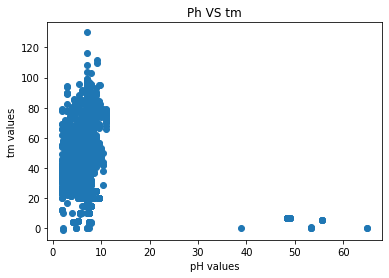

In [88]:
# Plotting the relation between pH and tm

pH = data['pH']
tm = data['tm']
plt.scatter(pH, tm)
plt.xlabel('pH values')
plt.ylabel('tm values')
plt.title('Ph VS tm')

In [89]:
# CALCULATING CHEMICAL PROPERTIES OF PROTEIN SEQUENCES

def calcualteAromaticity(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.aromaticity()

def calcualteIsoElectricPoint(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.isoelectric_point()

def calcualteMolecularWeight(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.molecular_weight()

def calcualteChargeAtPh(row):
    seq = str(row[1])
    ph = row[2]
    X = ProteinAnalysis(seq)
    return X.charge_at_pH(ph)

In [90]:
data['aromaticity'] = data.apply(calcualteAromaticity, axis=1)
data['isoelectric_point'] = data.apply(calcualteIsoElectricPoint, axis=1)
data['molecular_weight'] = data.apply(calcualteMolecularWeight, axis=1)
data['charge'] = data.apply(calcualteChargeAtPh, axis=1)

In [91]:
data.head()

,seq_id,protein_sequence,pH,tm,C,D,N,Q,H,K,...,A,P,I,G,E,T,aromaticity,isoelectric_point,molecular_weight,charge
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,0.002933,0.038123,0.014663,0.017595,0.008798,0.046921,...,0.131965,0.052786,0.041056,0.111437,0.087977,0.041056,0.058651,6.109589,36320.7244,-1.872851
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,0.000000,0.034965,0.020979,0.076923,0.013986,0.066434,...,0.097902,0.027972,0.045455,0.062937,0.181818,0.041958,0.041958,5.144349,32837.9931,-12.720355
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,0.018109,0.054326,0.030181,0.050302,0.022133,0.078471,...,0.100604,0.040241,0.032193,0.130785,0.064386,0.060362,0.080483,9.032101,53428.8034,11.730622
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,0.018868,0.071698,0.033962,0.033962,0.026415,0.064151,...,0.075472,0.060377,0.037736,0.060377,0.109434,0.071698,0.071698,4.683840,29475.5996,-20.561692
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,0.009649,0.053756,0.044797,0.037216,0.027567,0.046864,...,0.059269,0.088215,0.048932,0.057891,0.053756,0.082702,0.065472,5.917928,158761.9814,-21.664651


In [101]:
y = data['tm']
x = data.drop(['seq_id', 'protein_sequence', 'tm'], axis=1)

In [93]:
# def prepare_testing_data():
labels = pd.read_csv('./Data/test_labels.csv')
test = pd.read_csv('./Data/test.csv')

In [94]:
labels.head()

,seq_id,tm
0,31390,77.3
1,31391,77.3
2,31392,77.3
3,31393,76.6
4,31394,77.4


In [95]:
test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [120]:
x_test = test.drop(['data_source'], axis=1)
for amino_acid in amino_acids:
    x_test[amino_acid] = x_test['protein_sequence'].apply(lambda seq: seq.count(amino_acid)/len(seq))
    
x_test['aromaticity'] = x_test.apply(calcualteAromaticity, axis=1)
x_test['isoelectric_point'] = x_test.apply(calcualteIsoElectricPoint, axis=1)
x_test['molecular_weight'] = x_test.apply(calcualteMolecularWeight, axis=1)
x_test['charge'] = x_test.apply(calcualteChargeAtPh, axis=1)
x_test.head()

,seq_id,protein_sequence,pH,C,D,N,Q,H,K,M,...,A,P,I,G,E,T,aromaticity,isoelectric_point,molecular_weight,charge
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.018100,0.067873,0.085973,0.058824,0.0,0.108597,0.0,...,0.099548,0.076923,0.027149,0.085973,0.036199,0.036199,0.099548,8.751535,23910.2619,2.558953
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.018100,0.067873,0.085973,0.058824,0.0,0.113122,0.0,...,0.099548,0.076923,0.027149,0.085973,0.031674,0.036199,0.099548,9.024494,23909.3202,4.548770
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,0.018182,0.068182,0.086364,0.059091,0.0,0.109091,0.0,...,0.100000,0.077273,0.027273,0.086364,0.031818,0.036364,0.100000,8.907484,23781.1479,3.558671
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.022624,0.067873,0.085973,0.058824,0.0,0.104072,0.0,...,0.099548,0.076923,0.027149,0.085973,0.031674,0.036199,0.099548,8.699638,23869.2761,2.477663
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.018100,0.067873,0.085973,0.058824,0.0,0.104072,0.0,...,0.099548,0.076923,0.027149,0.085973,0.031674,0.036199,0.104072,8.761012,23913.3070,2.568572


In [121]:
y_test = labels['tm']
x_test = x_test.drop(['seq_id', 'protein_sequence'], axis=1)

In [128]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [132]:
y_pred = lr.predict(x_test)

In [136]:
mse = mean_absolute_error(y_test, y_pred)
mse

32.78942670748445

In [150]:
charge = np.array(data['charge'])
tm = np.array(data['tm'])
print(len(charge), len(tm))

31390 31390


In [153]:
charge = charge.reshape(-1, 1)  # Reshape charge into a 2D array with one column
tm = tm.reshape(-1, 1)          # Reshape tm into a 2D array with one column

# Now, you can fit the LinearRegression model
lr2 = LinearRegression()
lr2.fit(charge, tm)

LinearRegression()

In [159]:
x_test2 = np.array(x_test['charge']).reshape(-1, 1)
# y_pred2 = lr2.predict(x_test['charge'])

In [160]:
print(x_test2)

[[2.55895267]
 [4.54876992]
 [3.55867091]
 ...
 [3.55867091]
 [3.55867091]
 [3.55867091]]
